# LSTM

In this notebook, we will go through basics of LSTM, GRU, CuDNNLSTM, CuDNNGRU and Bi-LSTM using pretrained embeddings like word2vec, glove and fasttext and  also custom embeddings on IMDB dataset. 

Here we will use [keras](https://keras.io/  "Keras Homepage").


Everything is explained in-detail in [blog post](https://dudeperf3ct.github.io/lstm/gru/nlp/2019/01/28/Force-of-LSTM-and-GRU/). This is notebook which replicates the result of blog and runs in colab. Enjoy!

Let's see at [nlpprogess](http://nlpprogress.com/english/sentiment_analysis.html) what is the current state-of-the-art in sentiment analysis.


Model | Accuracy | Paper |
----- | -------- | ------|
ULMFit| 95.4     | [Universal Language Model Fine-tuning for Text Classification](https://arxiv.org/abs/1801.06146)|
Block-sparse LSTM| 94.99 | [GPU Kernels for Block-Sparse Weights](https://s3-us-west-2.amazonaws.com/openai-assets/blocksparse/blocksparsepaper.pdf)|
oh-LSTM | 94.1 | [Supervised and Semi-Supervised Text Categorization using LSTM for Region Embeddings](https://arxiv.org/abs/1602.02373) |
Virtual adversarial training  | 94.1 | [Adversarial Training Methods for Semi-Supervised Text Classification](https://arxiv.org/abs/1605.07725) |
BCN+Char+CoVe | 91.8 | [Learned in Translation: Contextualized Word Vectors](https://arxiv.org/abs/1708.00107) |


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/lstm_and_gru/lstm_and_gru_keras.ipynb)


## Download data and pretrained models

In [0]:
# download word2vec pretrained model on Google News
! gdown "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
! gunzip "/content/GoogleNews-vectors-negative300.bin.gz"

Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
1.65GB [00:11, 138MB/s]


In [0]:
# download pretrained glove model
! wget "http://nlp.stanford.edu/data/glove.6B.zip"
! unzip -q -n "glove.6B.zip"

--2019-02-26 13:47:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-02-26 13:47:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  9.26MB/s    in 78s     

2019-02-26 13:48:52 (10.5 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [0]:
# download pretrained fasttext model
! wget "https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.zip"
! unzip -q -n "wiki.simple.zip"

--2019-02-26 13:49:21--  https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.80
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2618496202 (2.4G) [application/zip]
Saving to: ‘wiki.simple.zip’

wiki.simple.zip     100%[===================>]   2.44G  21.4MB/s    in 2m 0s   

2019-02-26 13:51:22 (20.8 MB/s) - ‘wiki.simple.zip’ saved [2618496202/2618496202]



In [0]:
# ! wget "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip"
# ! unzip -q -n "wiki-news-300d-1M-subword.vec.zip"
! wget "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
! unzip -q -n "wiki-news-300d-1M.vec.zip"

--2019-02-26 13:52:01--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  8.54MB/s    in 56s     

2019-02-26 13:52:59 (11.6 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [0]:
# install spacy
! python -m spacy download en
! python -m spacy download en_core_web_md


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')

    100% |████████████████████████████████| 120.9MB 3.3MB/s 
  Running setup.py install for en-core-web-md ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



You need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal).

In [0]:
# #uncomment this once to upload kaggle.json

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
          open(k,'wb').write(v)
getLocalFiles()

Saving kaggle.json to kaggle.json


In [0]:
# #uncomment and run this once when you upload kaggle.json

! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
from pathlib import Path

path = Path("data")
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('data')

You're all set to download the data from [Bags of Model](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition. You first need to go to its main page and accept its rules, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a 403 forbidden error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on Rules tab, and then scroll to the bottom to find the accept button).

In [0]:
# download imdb dataset from kaggle competition
!kaggle competitions download -c word2vec-nlp-tutorial -p {path}

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 42.0MB/s]
 92% 24.0M/26.0M [00:00<00:00, 12.3MB/s]
100% 26.0M/26.0M [00:00<00:00, 38.0MB/s]
 40% 5.00M/12.6M [00:00<00:00, 9.11MB/s]
100% 12.6M/12.6M [00:00<00:00, 21.5MB/s]
 39% 5.00M/13.0M [00:00<00:00, 9.16MB/s]
100% 13.0M/13.0M [00:00<00:00, 20.4MB/s]


In [0]:
! unzip -q -n {path}/labeledTrainData.tsv.zip -d {path}
! unzip -q -n {path}/testData.tsv.zip -d {path}

## IMDB data

In [0]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Embedding, Dense, Input, CuDNNLSTM, GRU, CuDNNGRU, Bidirectional
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
path = Path("data")
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(path/"labeledTrainData.tsv", sep='\t', header=0, quoting=3)
data.head()

# test = pd.read_csv(path/"testData.tsv", sep='\t', header=0, quoting=3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [0]:
print (data['review'].shape, data['sentiment'].shape)

(25000,) (25000,)


## Gensim

[Gensim](https://radimrehurek.com/gensim/) is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

In [0]:
NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(data['review'])

# stitch back the words into sequnces with filtering stop words and converting to lower #text_to_word_sequence
sequences = tokenizer.texts_to_sequences(data['review'])
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 75899 unique tokens.


### Pretrained Word2Vec

In [0]:
from gensim.models import KeyedVectors

%time word_vectors = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin', binary=True)

CPU times: user 55 s, sys: 5.73 s, total: 1min
Wall time: 1min 2s


In [0]:
EMBEDDING_DIM = 300
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, i in word_index.items():
  
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

del(word_vectors)

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 6,219,906
Trainable params: 219,906
Non-trainable params: 6,000,000
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5923 - acc: 0.6876 - val_loss: 0.4976 - val_acc: 0.7806
Epoch 2/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5056 - acc: 0.7634 - val_loss: 0.4467 - val_acc: 0.8110
Epoch 3/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4960 - acc: 0.7690 - val_loss: 0.4755 - val_acc: 0.7766
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4647 - acc: 0.7855 - val_loss: 0.4011 - val_acc: 0.8294
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4603 - acc: 0.7865 - val_loss: 0.3782 - val_acc: 0.8430
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4057 - acc: 0.8179 - val_loss: 0.3547 - val_acc: 0.8462
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.

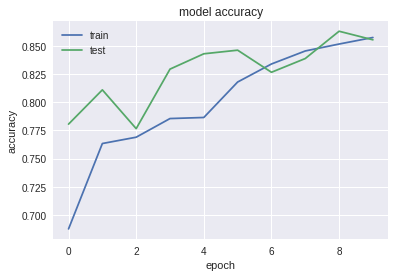

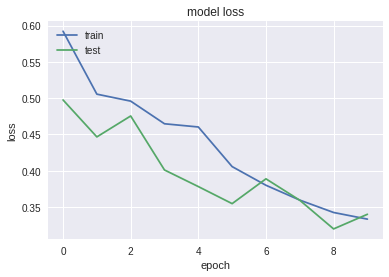

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Pretrained Glove

In [0]:
from gensim.scripts.glove2word2vec import glove2word2vec

# to convert the GloVe file format to the word2vec file format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [0]:
from gensim.models import KeyedVectors

%time word_vectors = KeyedVectors.load_word2vec_format('/content/glove.6B.100d.txt.word2vec', binary=False)

CPU times: user 37.5 s, sys: 455 ms, total: 37.9 s
Wall time: 37.9 s


In [0]:
EMBEDDING_DIM = 100
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, i in word_index.items():
  
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

del(word_vectors)

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (VOCAB_SIZE, EMBEDDING_DIM)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 100)          2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 2,080,602
Trainable params: 80,602
Non-trainable params: 2,000,000
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.6395 - acc: 0.6289 - val_loss: 0.5903 - val_acc: 0.7126
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5615 - acc: 0.7141 - val_loss: 0.4477 - val_acc: 0.8000
Epoch 3/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4700 - acc: 0.7782 - val_loss: 0.3923 - val_acc: 0.8268
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4180 - acc: 0.8078 - val_loss: 0.3586 - val_acc: 0.8434
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.3763 - acc: 0.8320 - val_loss: 0.3474 - val_acc: 0.8502
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3546 - acc: 0.8454 - val_loss: 0.3369 - val_acc: 0.8538
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3444 - acc: 0.8500 - val_loss: 0.3319 - val_acc:

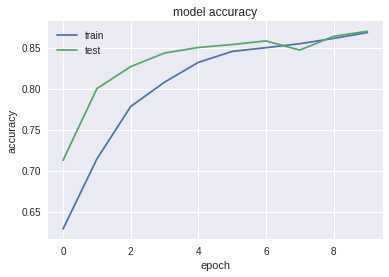

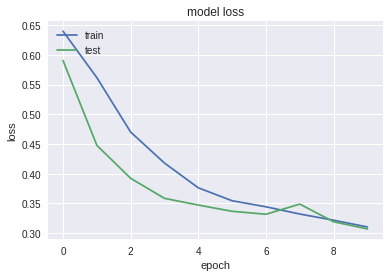

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Pretrained fasttext

In [0]:
from gensim.models.wrappers import FastText

%time word_vectors = FastText.load_fasttext_format('wiki.simple')

CPU times: user 23.9 s, sys: 1.58 s, total: 25.5 s
Wall time: 39 s


In [0]:
EMBEDDING_DIM = 300
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, i in word_index.items():
  
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

del(word_vectors)

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (VOCAB_SIZE, EMBEDDING_DIM)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(256, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 6,570,882
Trainable params: 570,882
Non-trainable params: 6,000,000
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.6177 - acc: 0.6426 - val_loss: 0.5850 - val_acc: 0.6876
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5628 - acc: 0.7018 - val_loss: 0.4878 - val_acc: 0.7802
Epoch 3/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5206 - acc: 0.7367 - val_loss: 0.5119 - val_acc: 0.7462
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4621 - acc: 0.7782 - val_loss: 0.3869 - val_acc: 0.8200
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4011 - acc: 0.8175 - val_loss: 0.3578 - val_acc: 0.8456
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3574 - acc: 0.8410 - val_loss: 0.3418 - val_acc: 0.8524
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3355 - acc: 0.8499 - val_loss: 0.3282 - val_acc:

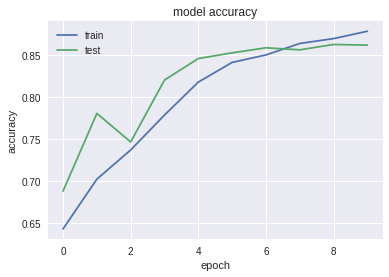

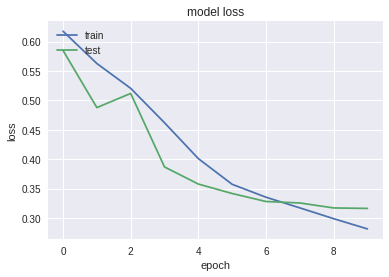

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Custom Word2Vec

Creating a custom word2vec model i.e. from our own dataset instead of using pretrained model

In [0]:
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

# Initializing the train model
from gensim.models import word2vec

# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords

# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk
nltk.download('punkt')
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    
    # Removing html tags
    review_text = BeautifulSoup(review).get_text()
    
    # Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # Converting to lower case and splitting
    words = review_text.lower().split()
    
    # Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)


In [0]:
# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=True):
    
    # Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    
    # Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence, remove_stopwords))

    # This returns the list of lists
    return sentences


In [0]:
sentences = []
print("Parsing sentences from training set")
for review in data["review"]:
    sentences += review_sentences(review, tokenizer)

Parsing sentences from training set


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [0]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
# Creating the model and setting values for the various parameters
num_features = 150  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

print("Training model....")
model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "150features_40minwords_10context_imdb"
model.save(model_name)

2019-02-26 14:39:56,238 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-02-26 14:39:56,240 : INFO : collecting all words and their counts
2019-02-26 14:39:56,241 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-26 14:39:56,301 : INFO : PROGRESS: at sentence #10000, processed 114931 words, keeping 17627 word types
2019-02-26 14:39:56,343 : INFO : PROGRESS: at sentence #20000, processed 228988 words, keeping 24797 word types
2019-02-26 14:39:56,383 : INFO : PROGRESS: at sentence #30000, processed 339533 words, keeping 29883 word types
2019-02-26 14:39:56,424 : INFO : PROGRESS: at sentence #40000, processed 453983 words, keeping 34196 word types


Training model....


2019-02-26 14:39:56,467 : INFO : PROGRESS: at sentence #50000, processed 565006 words, keeping 37609 word types
2019-02-26 14:39:56,508 : INFO : PROGRESS: at sentence #60000, processed 676637 words, keeping 40571 word types
2019-02-26 14:39:56,549 : INFO : PROGRESS: at sentence #70000, processed 789005 words, keeping 43180 word types
2019-02-26 14:39:56,591 : INFO : PROGRESS: at sentence #80000, processed 899771 words, keeping 45561 word types
2019-02-26 14:39:56,631 : INFO : PROGRESS: at sentence #90000, processed 1013453 words, keeping 47982 word types
2019-02-26 14:39:56,672 : INFO : PROGRESS: at sentence #100000, processed 1125135 words, keeping 50054 word types
2019-02-26 14:39:56,713 : INFO : PROGRESS: at sentence #110000, processed 1236261 words, keeping 51928 word types
2019-02-26 14:39:56,756 : INFO : PROGRESS: at sentence #120000, processed 1348541 words, keeping 53966 word types
2019-02-26 14:39:56,797 : INFO : PROGRESS: at sentence #130000, processed 1461911 words, keeping 

In [0]:
model.wv.most_similar("awful")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('terrible', 0.8913172483444214),
 ('horrible', 0.8555285930633545),
 ('dreadful', 0.8114152550697327),
 ('sucks', 0.7771377563476562),
 ('lousy', 0.7676631808280945),
 ('abysmal', 0.7665973901748657),
 ('horrid', 0.7587701678276062),
 ('horrendous', 0.7528089284896851),
 ('crappy', 0.7453817129135132),
 ('atrocious', 0.7430322766304016)]

In [0]:
model.wv.most_similar("amazing")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('fantastic', 0.8467389345169067),
 ('incredible', 0.8339853882789612),
 ('wonderful', 0.8116568922996521),
 ('outstanding', 0.7767613530158997),
 ('superb', 0.7459939122200012),
 ('excellent', 0.7354440093040466),
 ('stunning', 0.7323859333992004),
 ('magnificent', 0.7316502332687378),
 ('remarkable', 0.7282607555389404),
 ('brilliant', 0.7208505868911743)]

In [0]:
# This will give the total number of words in the vocabolary created from this dataset
print (model.wv.vectors.shape)

# Unique words in custom word vectors
word_vectors = model.wv
print ('Number of unique words in word vector: {}'.format(len(word_vectors.vocab)))

(8160, 150)
Number of unique words in word vector: 8160


In [0]:
EMBEDDING_DIM = 150
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, i in word_index.items():
  
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        embedding_matrix[i] = np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

del(word_vectors)

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.utils import to_categorical

NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(data['review'])

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequences = tokenizer.texts_to_sequences(data['review'])
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Found 75899 unique tokens.
Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 200, 150)          3000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               142848    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 3,143,106
Trainable params: 143,106
Non-trainable params: 3,000,000
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.6215 - acc: 0.6460 - val_loss: 0.5230 - val_acc: 0.7406
Epoch 2/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.5553 - acc: 0.7139 - val_loss: 0.4860 - val_acc: 0.7726
Epoch 3/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5448 - acc: 0.7227 - val_loss: 0.5194 - val_acc: 0.7532
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5065 - acc: 0.7510 - val_loss: 0.4257 - val_acc: 0.8050
Epoch 5/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4844 - acc: 0.7659 - val_loss: 0.4134 - val_acc: 0.8192
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4588 - acc: 0.7823 - val_loss: 0.4457 - val_acc: 0.7974
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4403 - acc: 0.7963 - val_loss: 0.4072 - val_acc:

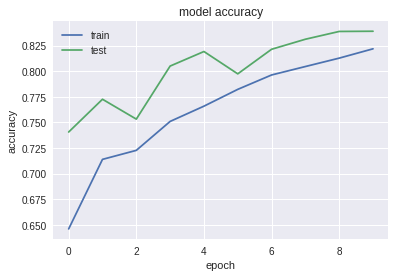

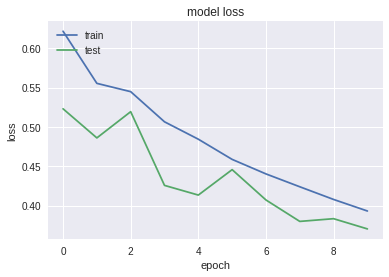

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## spaCy

In [0]:
import spacy
import string
from time import time
from keras.utils import to_categorical

nlp = spacy.load('en_core_web_md')

# Clean text before feeding it to spaCy
punctuations = string.punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [0]:
%%time

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(sentences, logging=False):
    texts = []
    counter = 1
    for word in sentences:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(word)))
        counter += 1
        doc = nlp(word, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return texts
  
sent = cleanup_text(data['review'])  

CPU times: user 14min 10s, sys: 9min 2s, total: 23min 12s
Wall time: 17min 52s


In [0]:
NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(sent)

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequences = tokenizer.texts_to_sequences(sent)
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 66179 unique tokens.


In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2
EMBED_DIM = 200
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 200)          4000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 4,168,706
Trainable params: 4,168,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 162s 8ms/step - loss: 0.4376 - acc: 0.7972 - val_loss: 0.3452 - val_acc: 0.8582
Epoch 2/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.2356 - acc: 0.9116 - val_loss: 0.3932 - val_acc: 0.8700
Epoch 3/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.1681 - acc: 0.9406 - val_loss: 0.3703 - val_acc: 0.8480
Epoch 4/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1188 - acc: 0.9587 - val_loss: 0.4036 - val_acc: 0.8540
Epoch 5/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.0905 - acc: 0.9679 - val_loss: 0.5185 - val_acc: 0.8586


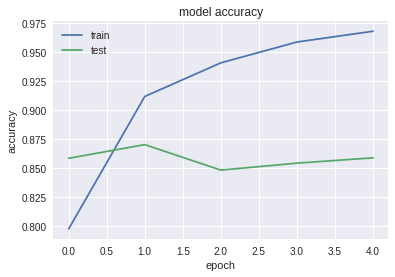

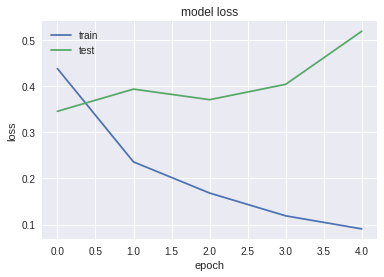

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## fasttext

In [0]:
import io
from tqdm import tqdm

# def load_vectors(fname): 
#     fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
#     n, d = map(int, fin.readline().split())
#     data = {}
#     for line in fin:
#         tokens = line.rstrip().split(' ')
#         data[tokens[0]] = map(float, tokens[1:])
#     return data
  
def load_vectors(fname):  
    embeddings_index = {}
    f = io.open(fname, encoding='utf-8', newline='\n', errors='ignore')
    for line in tqdm(f):
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

In [0]:
%time word_vectors = load_vectors('wiki.simple.vec')

111052it [00:09, 11540.02it/s]

CPU times: user 9.43 s, sys: 356 ms, total: 9.79 s
Wall time: 9.63 s


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.utils import to_categorical

NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(data['review'])

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequences = tokenizer.texts_to_sequences(data['review'])
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 75899 unique tokens.


In [0]:
EMBEDDING_DIM = 300
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, i in word_index.items():
  
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        embedding_matrix[i] = np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

del(word_vectors)

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(256, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 6,570,882
Trainable params: 570,882
Non-trainable params: 6,000,000
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.6032 - acc: 0.6583 - val_loss: 0.5221 - val_acc: 0.7390
Epoch 2/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.5401 - acc: 0.7190 - val_loss: 0.5058 - val_acc: 0.7574
Epoch 3/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4962 - acc: 0.7547 - val_loss: 0.4520 - val_acc: 0.7884
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4576 - acc: 0.7776 - val_loss: 0.3925 - val_acc: 0.8184
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3966 - acc: 0.8175 - val_loss: 0.3760 - val_acc: 0.8264
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.3589 - acc: 0.8391 - val_loss: 0.3451 - val_acc: 0.8416
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3363 - acc: 0.8486 - val_loss: 0.3283 - val_acc:

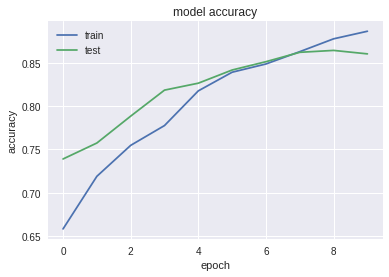

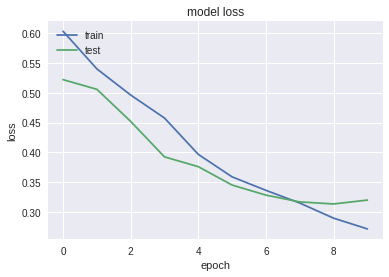

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Custom Embedding Layer using LSTM

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.utils import to_categorical

NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
EMBED_DIM = 300

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(data['review'])

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequences = tokenizer.texts_to_sequences(data['review'])
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 75899 unique tokens.


In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH,  EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 258       
Total params: 6,219,906
Trainable params: 6,219,906
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.4678 - acc: 0.7759 - val_loss: 0.3535 - val_acc: 0.8464
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2824 - acc: 0.8909 - val_loss: 0.4198 - val_acc: 0.7996
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2216 - acc: 0.9157 - val_loss: 0.4070 - val_acc: 0.8460
Epoch 4/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2083 - acc: 0.9193 - val_loss: 0.4524 - val_acc: 0.8076


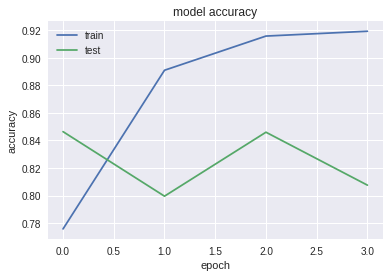

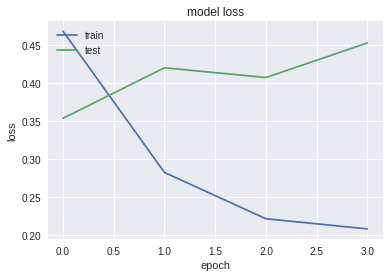

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Custom Embedding Layer using Bidirectional LSTM

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.utils import to_categorical

NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
EMBED_DIM = 300

# convert each word into token(integer) with maximum number of words based on frequency is 20000
tokenizer = Tokenizer(num_words=NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'', lower=True)
tokenizer.fit_on_texts(data['review'])

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequences = tokenizer.texts_to_sequences(data['review'])
# convert all sentences to equal length of 200
sentences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 75899 unique tokens.


In [0]:
labels = data['sentiment'].values

X, Y = sentences, labels

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)

print ('Training:', train_x.shape, train_y.shape)
print ('Validation:', val_x.shape, val_y.shape)

Training: (20000, 200) (20000, 2)
Validation: (5000, 200) (5000, 2)


In [0]:
num_classes = 2
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               439296    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 6,439,810
Trainable params: 6,439,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 163s 8ms/step - loss: 0.4896 - acc: 0.7560 - val_loss: 0.3622 - val_acc: 0.8462
Epoch 2/10
20000/20000 [==============================] - 170s 8ms/step - loss: 0.2948 - acc: 0.8813 - val_loss: 0.3490 - val_acc: 0.8670
Epoch 3/10
20000/20000 [==============================] - 312s 16ms/step - loss: 0.2422 - acc: 0.9084 - val_loss: 0.3454 - val_acc: 0.8608
Epoch 4/10
20000/20000 [==============================] - 330s 17ms/step - loss: 0.1917 - acc: 0.9272 - val_loss: 0.3974 - val_acc: 0.8514
Epoch 5/10
20000/20000 [==============================] - 266s 13ms/step - loss: 0.1250 - acc: 0.9551 - val_loss: 0.4385 - val_acc: 0.8376


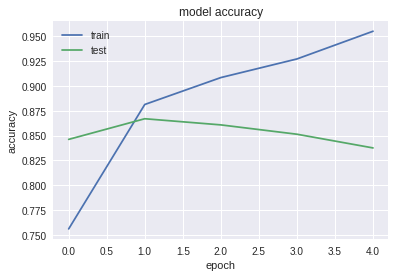

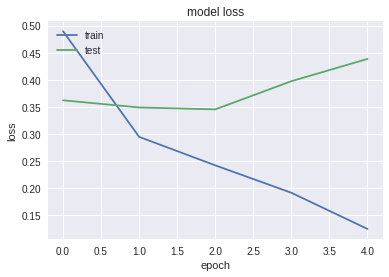

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Custom Embedding Layer using GRU

In [0]:
num_classes = 2
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = GRU(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 200)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 200, 300)          6000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               164736    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 6,164,994
Trainable params: 6,164,994
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5299 - acc: 0.7245 - val_loss: 0.3942 - val_acc: 0.8226
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.3156 - acc: 0.8728 - val_loss: 0.3766 - val_acc: 0.8374
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2430 - acc: 0.9035 - val_loss: 0.4216 - val_acc: 0.8254
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1556 - acc: 0.9452 - val_loss: 0.4551 - val_acc: 0.8522
Epoch 5/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1047 - acc: 0.9634 - val_loss: 0.5046 - val_acc: 0.8318
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0745 - acc: 0.9761 - val_loss: 0.5858 - val_acc: 0.8364
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0534 - acc: 0.9831 - val_loss: 0.6552 - val_acc:

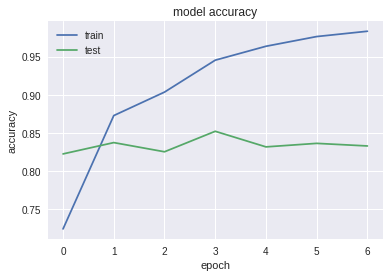

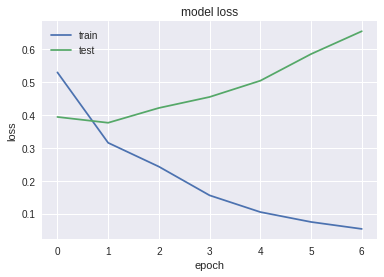

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Custom Embedding Layer using cuDNNLSTM

In [0]:
num_classes = 2
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = CuDNNLSTM(128)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 200)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 200, 300)          6000000   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               220160    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total params: 6,220,418
Trainable params: 6,220,418
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 707us/step - loss: 0.4499 - acc: 0.7802 - val_loss: 0.3344 - val_acc: 0.8628
Epoch 2/10
20000/20000 [==============================] - 10s 496us/step - loss: 0.2284 - acc: 0.9130 - val_loss: 0.3415 - val_acc: 0.8592
Epoch 3/10
20000/20000 [==============================] - 10s 494us/step - loss: 0.1359 - acc: 0.9531 - val_loss: 0.3786 - val_acc: 0.8630
Epoch 4/10
20000/20000 [==============================] - 10s 496us/step - loss: 0.0851 - acc: 0.9715 - val_loss: 0.4559 - val_acc: 0.8590
Epoch 5/10
20000/20000 [==============================] - 10s 496us/step - loss: 0.0586 - acc: 0.9818 - val_loss: 0.4890 - val_acc: 0.8542
Epoch 6/10
20000/20000 [==============================] - 10s 498us/step - loss: 0.0570 - acc: 0.9800 - val_loss: 0.5604 - val_acc: 0.8520


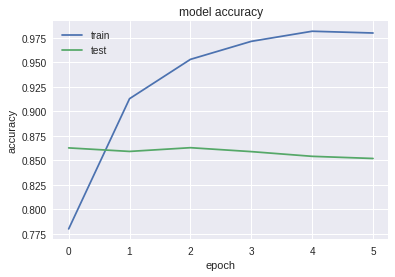

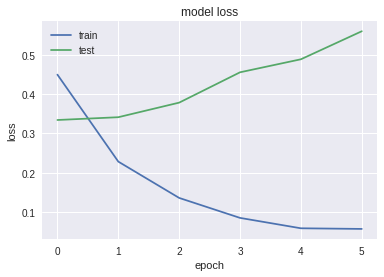

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Custom Embedding Layer using cuDNNGRU

In [0]:
num_classes = 2
VOCAB_SIZE = min(len(word_index)+1, NUM_WORDS)

# input layer with shape = (MAX_SEQUENCE_LENGTH,)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# convert the sequence input to embedding from (MAX_SEQUENCE_LENGTH, ) -> (None, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)
embedded_sequences = Embedding(VOCAB_SIZE, EMBED_DIM)(sequence_input)

x = CuDNNGRU(128)(embedded_sequences)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=sequence_input, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 200)               0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 200, 300)          6000000   
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 128)               165120    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 6,165,378
Trainable params: 6,165,378
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(train_x, train_y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x, val_y),
                    callbacks =[es])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 573us/step - loss: 0.4450 - acc: 0.7833 - val_loss: 0.3272 - val_acc: 0.8580
Epoch 2/10
20000/20000 [==============================] - 9s 439us/step - loss: 0.2002 - acc: 0.9262 - val_loss: 0.3840 - val_acc: 0.8680
Epoch 3/10
20000/20000 [==============================] - 9s 430us/step - loss: 0.1106 - acc: 0.9621 - val_loss: 0.3761 - val_acc: 0.8494
Epoch 4/10
20000/20000 [==============================] - 9s 436us/step - loss: 0.0649 - acc: 0.9790 - val_loss: 0.5475 - val_acc: 0.8428
Epoch 5/10
20000/20000 [==============================] - 9s 441us/step - loss: 0.0663 - acc: 0.9770 - val_loss: 0.5244 - val_acc: 0.8470


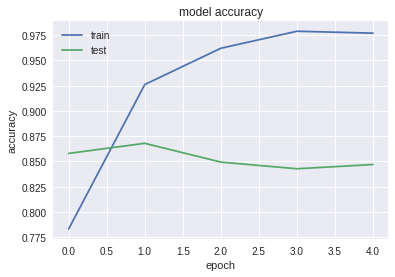

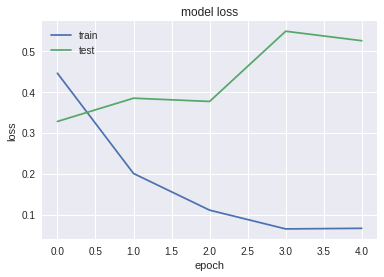

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [0]:
test = pd.read_csv(path/"testData.tsv", sep='\t', header=0, quoting=3)

review = test[:10]

# stitch back the words into sequnces with filtering stop words and converting to lower text_to_word_sequence
sequence = tokenizer.texts_to_sequences(review['review'])

# convert all sentences to equal length of 200
sentence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

preds = model.predict(sentence)

In [0]:
for i in range(len(review)):
  print ('Sentence:', review['review'].iloc[i])
  print ('Prediction:', preds[i])

Sentence: "Naturally in a film who's main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce's short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Huston makes such as the inclusion of the poem fit in neatly. It is truly a masterpiece of tact, subtlety and overwhelming beauty."
Prediction: [7.4012915e-04 9.9925989e-01]
Sentence: "This movie is a disaster within a disaster film. It is full of great action scenes, which are only meaningful if you throw away all sense of reality. Let's see, word